In [1]:
import pandas as pd

path=r'D:\WORKSPACE\OFIICE_WORKS\model\src\saver\thetas_combined.csv'


data=pd.read_csv(path)

print(data.head())

   Openness  Conscientiousness  Extraversion  Agreeableness  Neuroticism
0 -0.246167          -0.062668     -0.120977      -0.027482     0.115858
1 -0.515862           0.088507      0.197458      -0.344494     0.211334
2 -0.053402           0.202248     -0.471009      -0.649118     0.133886
3  0.102197           0.537538     -0.178925      -0.686309     0.185773
4  0.589575          -0.068297      0.178695      -0.226650    -0.093253


In [7]:
likerata_df=pd.read_parquet(r'D:\WORKSPACE\OFIICE_WORKS\model\src\saver\likert_data.parquet')
likerata_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X_scaled=StandardScaler()
X_scaled=X_scaled.fit_transform(data)

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data["cluster"] = kmeans.fit_predict(X_scaled)

In [46]:
data.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,cluster
0,-0.246167,-0.062668,-0.120977,-0.027482,0.115858,4
1,-0.515862,0.088507,0.197458,-0.344494,0.211334,3
2,-0.053402,0.202248,-0.471009,-0.649118,0.133886,4
3,0.102197,0.537538,-0.178925,-0.686309,0.185773,4
4,0.589575,-0.068297,0.178695,-0.226650,-0.093253,4


In [3]:
import pandas as pd

# Example: assuming you already have 'data' (150,000 rows)
# Compute all stats efficiently:
summary = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std(),
    'range': data.max() - data.min()
}).T  # transpose so rows = stats, columns = features

summary


,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
min,-1.929073,-2.171724,-1.981243,-1.827443,-1.841309
max,2.086098,2.275210,1.886057,2.116379,1.984153
mean,0.093028,0.208005,-0.211355,0.153797,0.125208
std,0.404052,0.377679,0.344916,0.459921,0.369400
range,4.015171,4.446934,3.867300,3.943822,3.825462


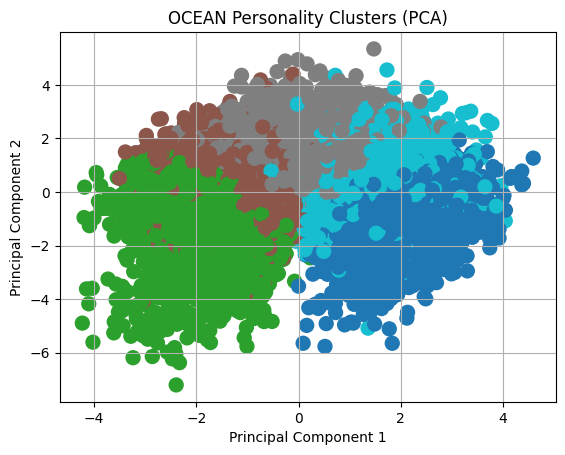

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["cluster_gmm"], cmap="tab10", s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("OCEAN Personality Clusters (PCA)")
plt.grid(True)
plt.show()


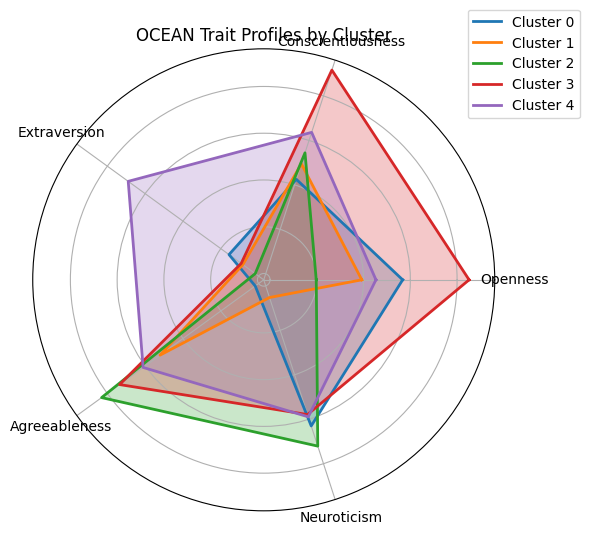

(       Openness  Conscientiousness  Extraversion  Agreeableness  Neuroticism  \
 0     -0.246167          -0.062668     -0.120977      -0.027482     0.115858   
 1     -0.515862           0.088507      0.197458      -0.344494     0.211334   
 2     -0.053402           0.202248     -0.471009      -0.649118     0.133886   
 3      0.102197           0.537538     -0.178925      -0.686309     0.185773   
 4      0.589575          -0.068297      0.178695      -0.226650    -0.093253   
 ...         ...                ...           ...            ...          ...   
 99995  0.172911           0.302738     -0.502483       0.320093     0.015056   
 99996 -0.083088           0.542187      0.030772       0.513830    -0.456013   
 99997  0.123021          -0.018950      0.470746       0.155940     0.700183   
 99998 -0.028328           0.701800     -0.255757       0.086451     0.089705   
 99999  0.531200           0.567922     -0.564401      -0.175258     0.253375   
 
        cluster          c

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean trait values for each cluster
cluster_means = data.groupby("cluster_gmm")[["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]].mean()

# Define radar plot setup
traits = cluster_means.columns.tolist()
num_traits = len(traits)

angles = np.linspace(0, 2 * np.pi, num_traits, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for idx, (cluster_id, row) in enumerate(cluster_means.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster_id}")
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(traits)
plt.title("OCEAN Trait Profiles by Cluster")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

# Assign semantic labels (based on relative means)
semantic_labels = {}
for cluster_id, row in cluster_means.iterrows():
    if row["Conscientiousness"] > 0 and row["Neuroticism"] > 0:
        semantic_labels[cluster_id] = "Organized & Sensitive"
    elif row["Agreeableness"] < -0.3:
        semantic_labels[cluster_id] = "Reserved & Analytical"
    else:
        semantic_labels[cluster_id] = "Balanced Type"

data["cluster_label"] = data["cluster"].map(semantic_labels)
data, cluster_means


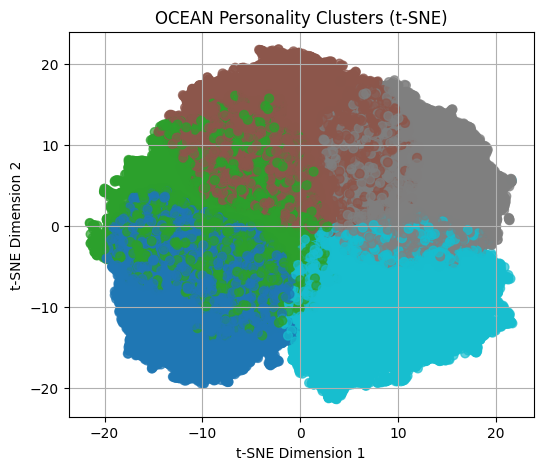

In [64]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data["cluster"], cmap="tab10", s=40, alpha=0.7)
plt.title("OCEAN Personality Clusters (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()


In [71]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
data["cluster_gmm"] = gmm.fit_predict(X_scaled)


In [72]:
data.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,cluster,cluster_label,cluster_gmm
0,-0.246167,-0.062668,-0.120977,-0.027482,0.115858,4,Organized & Sensitive,0
1,-0.515862,0.088507,0.197458,-0.344494,0.211334,3,Organized & Sensitive,4
2,-0.053402,0.202248,-0.471009,-0.649118,0.133886,4,Organized & Sensitive,0
3,0.102197,0.537538,-0.178925,-0.686309,0.185773,4,Organized & Sensitive,0
4,0.589575,-0.068297,0.178695,-0.226650,-0.093253,4,Organized & Sensitive,0


In [78]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

ch = calinski_harabasz_score(X_scaled, data["cluster_gmm"])
db = davies_bouldin_score(X_scaled, data["cluster_gmm"])

print(f"Calinski-Harabasz: {ch:.2f}")
print(f"Davies-Bouldin: {db:.3f}")


Calinski-Harabasz: 21342.02
Davies-Bouldin: 1.559


In [6]:
import json

with open(r'D:\WORKSPACE\OFIICE_WORKS\model\src\lexicon.json', "r", encoding="utf-8") as file:
    data = json.load(file)

# print(json.dumps(data, indent=4))
print(data.keys())


dict_keys(['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'])


In [8]:
import json
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load the base lexicon
base_lexicon = data

model = SentenceTransformer('all-MiniLM-L6-v2')

def expand_trait(trait, seed_words, vocab, top_k=300, similarity_threshold=0.6):
    # embed seeds
    seed_emb = model.encode(seed_words, convert_to_tensor=True)
    # embed vocab
    vocab_emb = model.encode(vocab, convert_to_tensor=True)
    sims = util.cos_sim(seed_emb.mean(dim=0, keepdim=True), vocab_emb)[0]
    top_idx = sims.argsort(descending=True)[:top_k]
    expanded = [vocab[i] for i in top_idx if sims[i] >= similarity_threshold]
    # combine and dedupe
    combined = list(set(seed_words + expanded))
    return combined

# Build a large vocabulary (e.g., from WordNet, a corpus, or a large word list)
# For example using word list from nltk or a domain file.
import nltk
nltk.download('words')
from nltk.corpus import words
vocab = words.words()

# Expand each trait
expanded_lexicon = {}
for trait, seed in base_lexicon.items():
    expanded = expand_trait(trait, seed, vocab, top_k=2000, similarity_threshold=0.5)
    # Trim or pad to ~1000 words
    if len(expanded) > 1000:
        expanded = expanded[:1000]
    expanded_lexicon[trait] = expanded

# Save to JSON
with open('trait_lexicon_expanded.json', 'w', encoding='utf-8') as f:
    json.dump(expanded_lexicon, f, indent=2, ensure_ascii=False)

print("Expanded lexicon saved to trait_lexicon_expanded.json")


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rohith\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


✅ Expanded lexicon saved to trait_lexicon_expanded.json


In [ ]:
import json
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Step 1: Load pre-trained Sentence Transformer model
# "all-MiniLM-L6-v2" = small, fast, high quality for semantic similarity
model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2: Load your lexicon (each trait has a list of descriptive words)
def load_lexicon(path: str):
    with open(path, "r", encoding="utf-8") as f:
        lexicon = json.load(f)
    lexicon = {
        trait: " ".join(map(str.lower, words)) 
        for trait, words in lexicon.items()
    }
    return lexicon

# Example lexicon file path
lexicon_path = r"D:\WORKSPACE\OFIICE_WORKS\model\src\trait_lexicon_expanded.json"
OCEAN_DESCRIPTIONS = load_lexicon(lexicon_path)

# Step 3: Encode the trait descriptions semantically
trait_names = list(OCEAN_DESCRIPTIONS.keys())
trait_sentences = list(OCEAN_DESCRIPTIONS.values())
trait_embeddings = model.encode(trait_sentences, normalize_embeddings=True)

# Step 4: Function to predict OCEAN personality semantically
def predict_ocean_semantic(text: str):
    text_emb = model.encode(text, normalize_embeddings=True)
    sims = util.cos_sim(text_emb, trait_embeddings).cpu().numpy().flatten()
    sims = (sims - sims.min()) / (sims.max() - sims.min() + 1e-8)  # normalize 0–1
    return dict(zip(trait_names, sims))

# Step 5: Example usage
if __name__ == "__main__":
    text = """
 I feel little concern for others.
    """
    scores = predict_ocean_semantic(text)

    print("\nSemantic OCEAN Personality Scores:")
    for t, s in scores.items():
        print(f"{t:20s}: {s:.3f}")

    dominant = max(scores, key=scores.get)
    print("\nDominant Trait:", dominant)



Semantic OCEAN Personality Scores:
Openness            : 0.111
Conscientiousness   : 0.000
Extraversion        : 0.520
Agreeableness       : 1.000
Neuroticism         : 0.897

Dominant Trait: Agreeableness
